## 의사결정 트리_Decision Tree 알고리즘-연습문제

### 데이터 세트
- UCI Machine Learning 저장소의 독일 신용 데이터를 통해 결정트리 분류 분석 수행

### 의사결정 트리 알고리즘 사용 신용 등급 예측 모델링 
- 의사결정 트리 그래프
- 모델링
- 하이퍼 파라미터 튜닝
- 성능평가지표 출력
- 피처 중요도 확인 


In [1]:
import pandas as pd
credit = pd.read_csv('../data/credit_final.csv')
credit.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [2]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

In [3]:
credit.describe()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.183000,20.903000,2.292000,2.965000,3271.24800,1.874000,2.44600,2.973000,2.372000,...,2.845000,2.358000,35.54200,1.814000,1.928000,1.367000,2.904000,1.155000,1.404000,1.037000
std,0.458487,0.835589,12.058814,0.620581,0.971967,2822.75176,1.196476,1.10558,1.118715,1.067125,...,1.103718,1.050209,11.35267,0.389301,0.530186,0.482228,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,1.000000,1.000000,250.00000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.000000,2.000000,1365.50000,1.000000,2.00000,2.000000,1.000000,...,2.000000,1.000000,27.00000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.000000,3.000000,2319.50000,1.000000,2.00000,3.000000,3.000000,...,3.000000,2.000000,33.00000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,24.000000,3.000000,4.000000,3972.25000,3.000000,4.00000,4.000000,3.000000,...,4.000000,3.000000,42.00000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,3.000000,72.000000,3.000000,4.000000,18424.00000,4.000000,4.00000,4.000000,4.000000,...,4.000000,4.000000,75.00000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.000000


In [4]:
label_data = credit['credit.rating']
feature_data = credit.drop('credit.rating', axis=1)

## 각 데이터의 분포 시각 확인

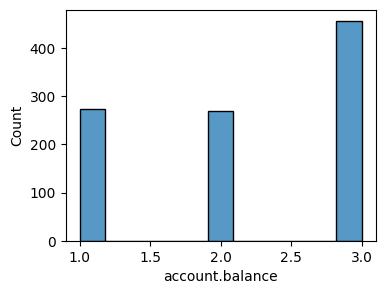

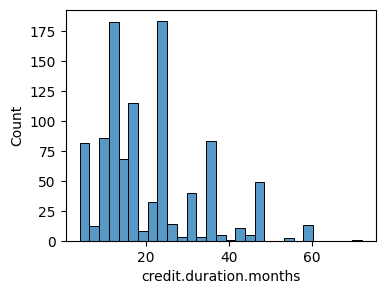

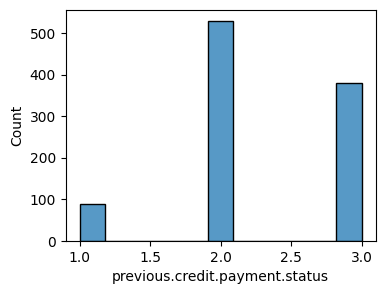

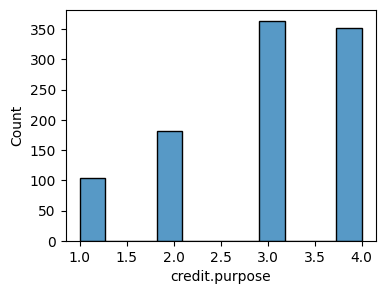

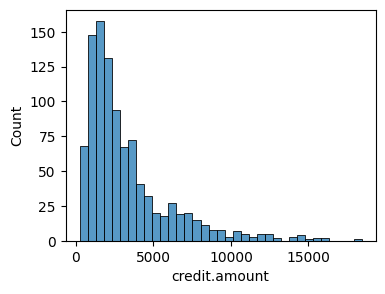

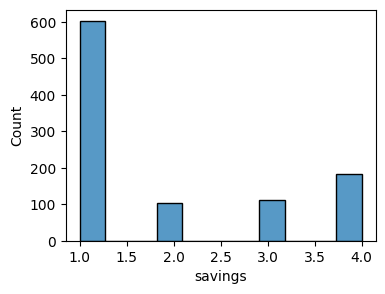

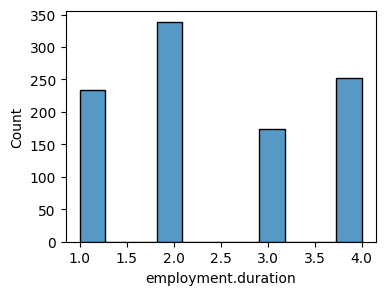

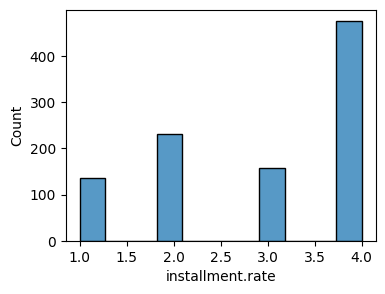

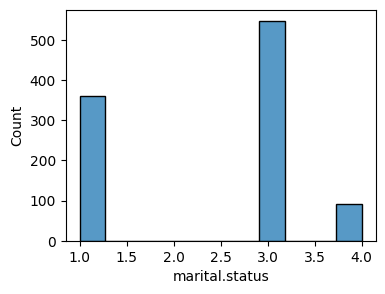

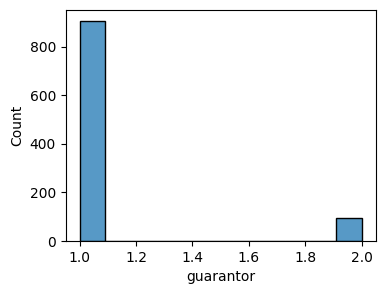

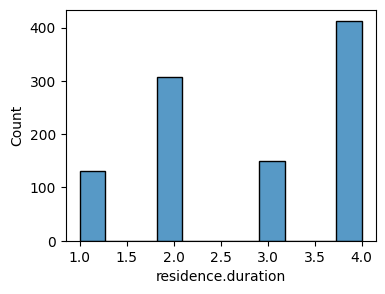

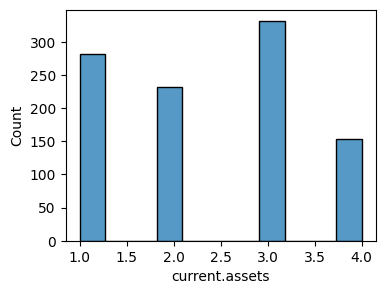

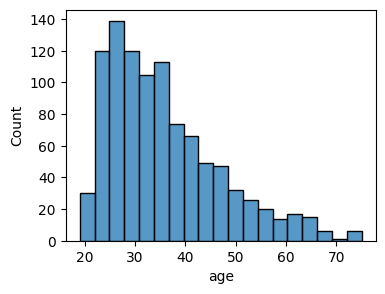

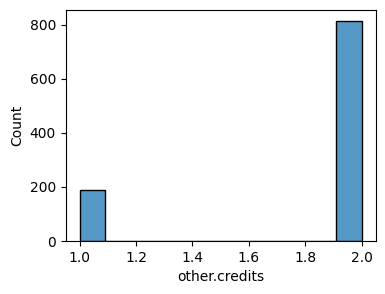

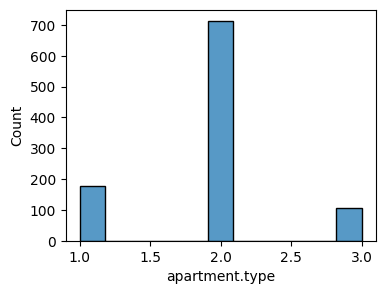

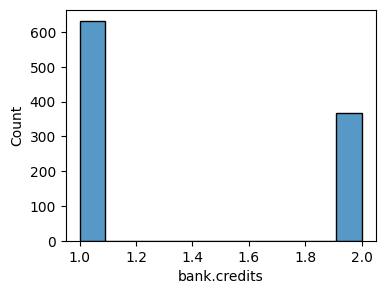

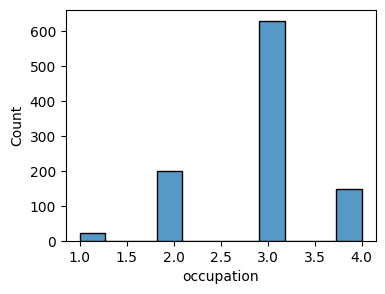

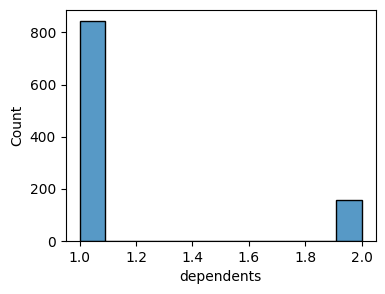

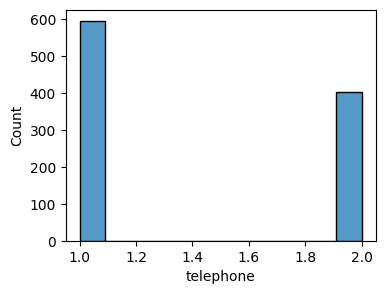

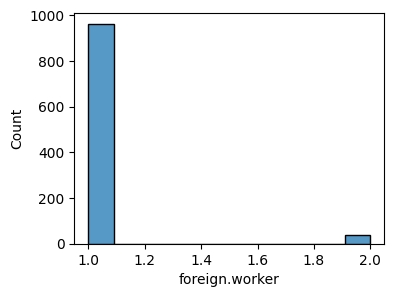

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = feature_data.columns
for col in cols:
    plt.figure(figsize=(4, 3))
    sns.histplot(feature_data[col])
    plt.plot()

## 학습, 테스트 데이터 분리

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    feature_data, label_data, stratify=label_data, test_size=0.2, random_state=11
)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
# 깔끔하게 분류됨

credit.rating
1    0.7
0    0.3
Name: proportion, dtype: float64
credit.rating
1    0.7
0    0.3
Name: proportion, dtype: float64


In [7]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

[Text(0.5966035706882256, 0.9722222222222222, 'account.balance <= 2.5\ngini = 0.42\nsamples = 800\nvalue = [240, 560]'),
 Text(0.37314080638474295, 0.9166666666666666, 'credit.duration.months <= 31.5\ngini = 0.495\nsamples = 441\nvalue = [198, 243]'),
 Text(0.13392672056384744, 0.8611111111111112, 'credit.duration.months <= 11.5\ngini = 0.476\nsamples = 348\nvalue = [136, 212]'),
 Text(0.06301824212271974, 0.8055555555555556, 'age <= 34.5\ngini = 0.308\nsamples = 63\nvalue = [12, 51]'),
 Text(0.03316749585406302, 0.75, 'current.assets <= 1.5\ngini = 0.459\nsamples = 28\nvalue = [10, 18]'),
 Text(0.01990049751243781, 0.6944444444444444, 'credit.purpose <= 2.5\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.013266998341625208, 0.6388888888888888, 'residence.duration <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.006633499170812604, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.01990049751243781, 0.5833333333333334, 'gini = 0.0\nsamples = 1\

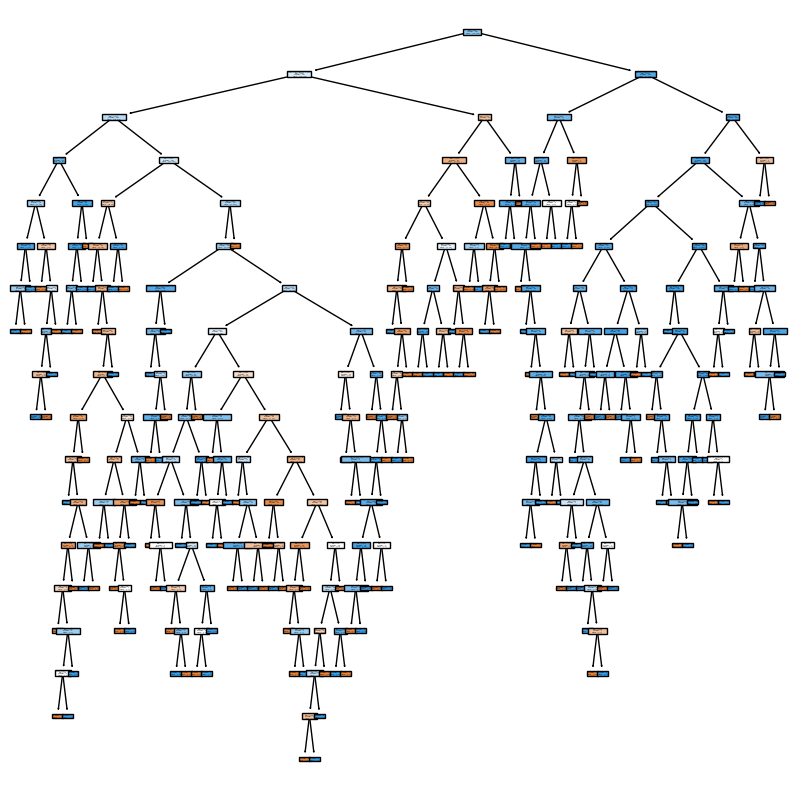

In [8]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 10))
plot_tree(dt_clf, filled=True, feature_names=list(feature_data.columns))
# 육안으로 확인하기 어렵다;;;

In [9]:
# 성능 평가지표 출력 함수
from sklearn.metrics import confusion_matrix,precision_score, \
recall_score, accuracy_score, f1_score, roc_curve, auc, roc_auc_score

def get_clf_eval(y_test, y_pred, y_pred_proba):
    print("< Confusion Matrix >")
    print(confusion_matrix(y_test, y_pred))
    
    print("Accuracy : ", end="")
    print(f"{accuracy_score(y_test, y_pred):.4f}", end=", ")
    
    print("Precision : ", end="")
    print(f"{precision_score(y_test, y_pred):.4f}", end=", ")
    
    print("Recall : ", end="")
    print(f"{recall_score(y_test, y_pred):.4f}", end=", ")
    
    print("F1 Score : ", end="")
    print(f"{f1_score(y_test, y_pred):.4f}", end=", ")
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
    print("AUC of ROC : ", end="")
    print(f"{auc(fpr, tpr):.4f}")

In [10]:
y_pred = dt_clf.predict(X_test)
y_pred_proba = dt_clf.predict_proba(X_test)[:,1]

In [11]:
get_clf_eval(y_test, y_pred, y_pred_proba)
# 순수 디폴트로 진행했을 경우도 괜찮은?

< Confusion Matrix >
[[ 30  30]
 [ 37 103]]
Accuracy : 0.6650, Precision : 0.7744, Recall : 0.7357, F1 Score : 0.7546, AUC of ROC : 0.6179


## 파라미터 조정

In [12]:
# 일련의 과정을 모두 함수로 제작
from sklearn.metrics import precision_recall_curve
import numpy as np

def process(data_set, random_state, diagram, prec_rec, **params):
    X_train, X_test, y_train, y_test = data_set
    
    # 파라미터 적용
    dt_clf = DecisionTreeClassifier(random_state=random_state, **params)
    dt_clf.fit(X_train, y_train)
    
    # 결과 출력
    y_pred = dt_clf.predict(X_test)
    y_pred_proba = dt_clf.predict_proba(X_test)[:,1]
    get_clf_eval(y_test, y_pred, y_pred_proba)
    
    if diagram:
        plt.figure(figsize=(10, 10))
        plot_tree(dt_clf, filled=True, feature_names=list(feature_data.columns))
        plt.show()
    
    if prec_rec:
        precision, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
        lim = thresholds.size
        lim

        plt.plot(thresholds, precision[:lim], linestyle='--', label='Precision')
        plt.plot(thresholds, recalls[:lim], label='Recall')
        plt.yticks(np.linspace(0, 1, 11))
        plt.xlabel('Threshold')
        plt.xticks(np.linspace(0, 1, 21), rotation=60)
        plt.grid(True)
        plt.legend(ncol=1)
        plt.show()

In [13]:
data_set = (X_train, X_test, y_train, y_test)

< Confusion Matrix >
[[ 19  41]
 [ 16 124]]
Accuracy : 0.7150, Precision : 0.7515, Recall : 0.8857, F1 Score : 0.8131, AUC of ROC : 0.6646


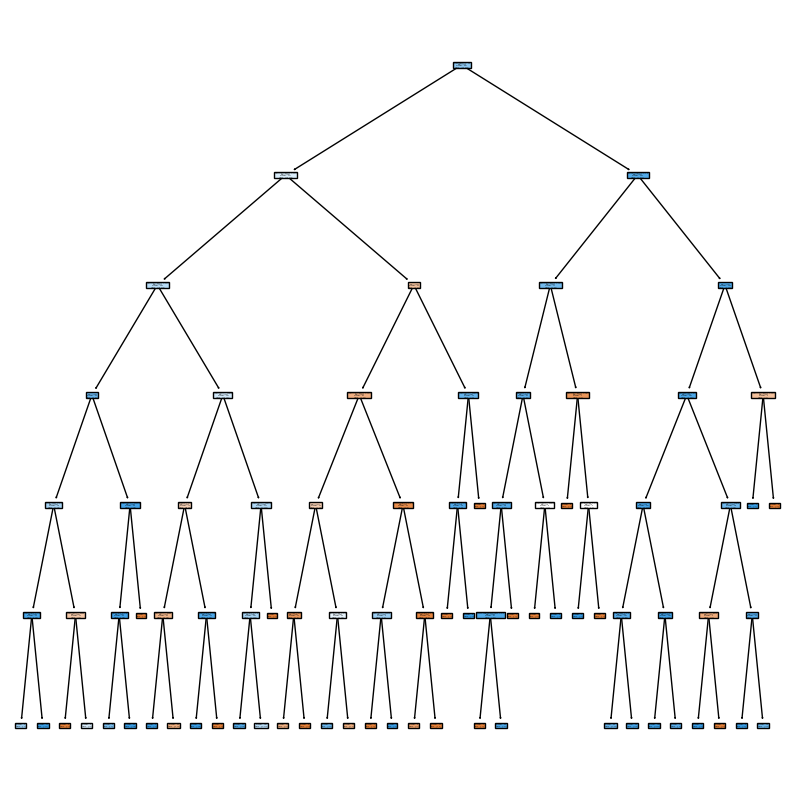

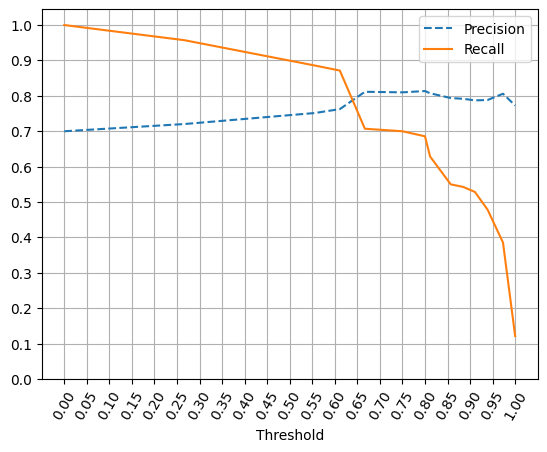

In [14]:
process(data_set=data_set, random_state=11, diagram=True, prec_rec=True,
        max_depth=6
)

< Confusion Matrix >
[[ 24  36]
 [ 30 110]]
Accuracy : 0.6700, Precision : 0.7534, Recall : 0.7857, F1 Score : 0.7692, AUC of ROC : 0.6440


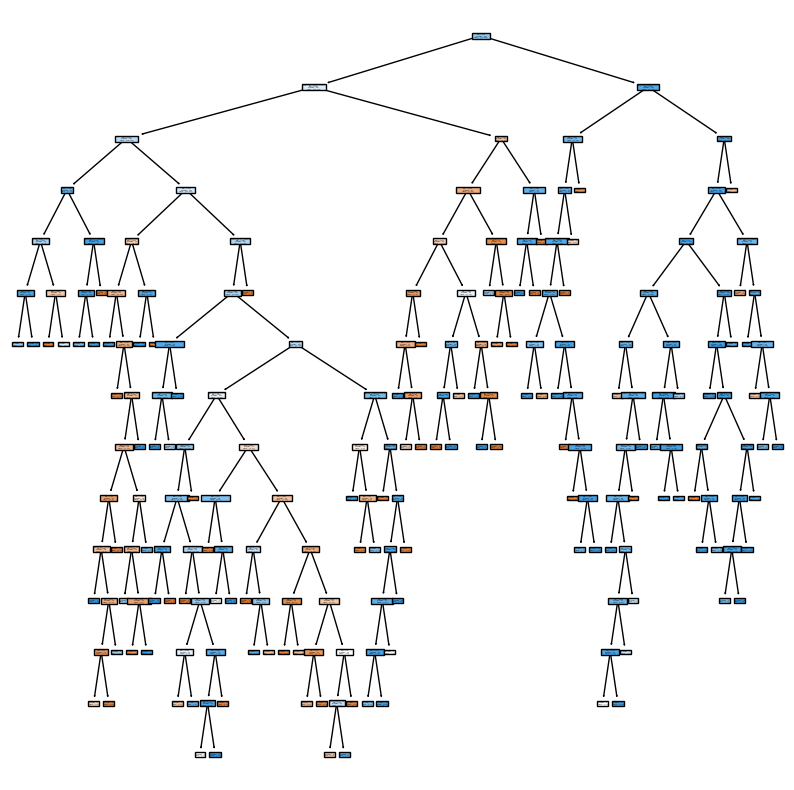

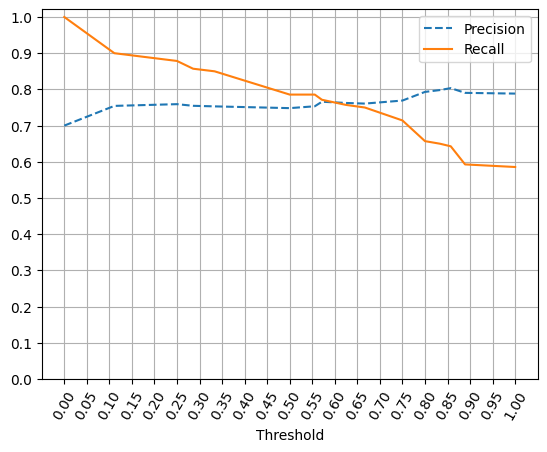

In [15]:
process(data_set=data_set, random_state=11, diagram=True, prec_rec=True,
        min_samples_split=10
)

< Confusion Matrix >
[[ 24  36]
 [ 22 118]]
Accuracy : 0.7100, Precision : 0.7662, Recall : 0.8429, F1 Score : 0.8027, AUC of ROC : 0.6412


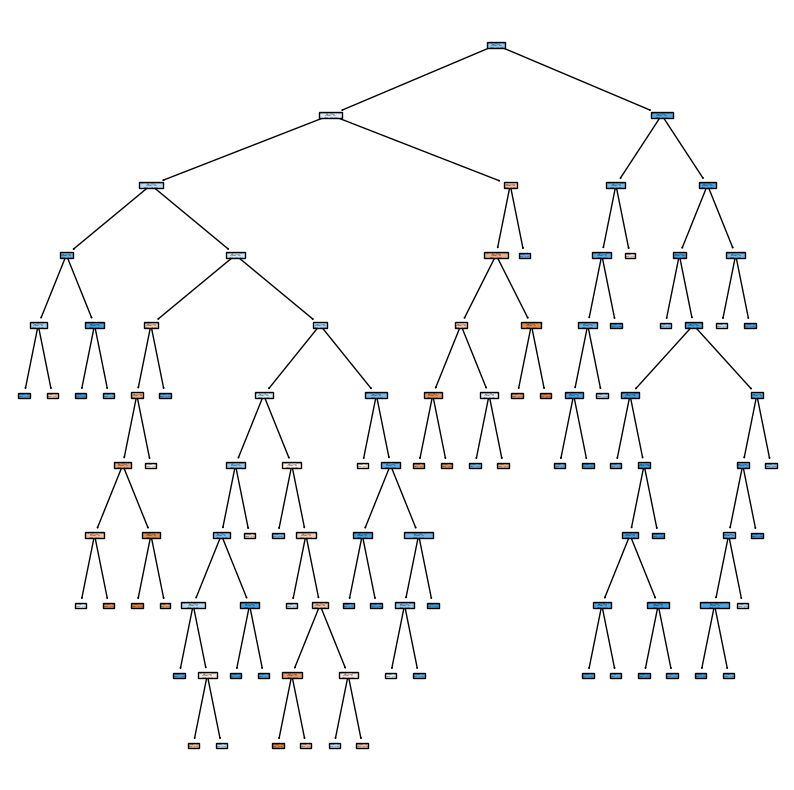

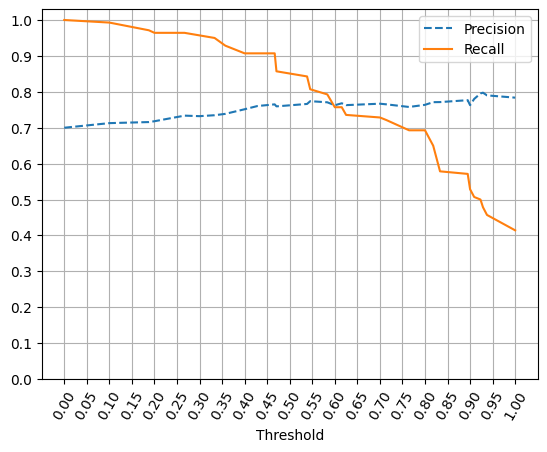

In [16]:
process(data_set=data_set, random_state=11, diagram=True, prec_rec=True,
        min_samples_leaf=10
)

In [17]:
## GridSearchCV로 최고정확도 찾기
from sklearn.model_selection import GridSearchCV

# 파라미터 설정
parameters = {
    'max_depth' : [4, 5, 6, 7, 8, 9],
    'min_samples_split' : [5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [3, 4, 5, 6, 7, 8]
}
grid_dt_clf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dt_clf.fit(X_train, y_train)

result = pd.DataFrame(grid_dt_clf.cv_results_['params'])
result['mean_score'] = grid_dt_clf.cv_results_['mean_test_score']
result.sort_values(by='mean_score', ascending=False).head(10)

,max_depth,min_samples_leaf,min_samples_split,mean_score
120,7,5,5,0.73875
121,7,5,6,0.73875
125,7,5,10,0.73875
124,7,5,9,0.73875
122,7,5,7,0.73875
123,7,5,8,0.73875
113,7,3,10,0.73500
206,9,7,7,0.73375
204,9,7,5,0.73375
205,9,7,6,0.73375


< Confusion Matrix >
[[ 17  43]
 [ 16 124]]
Accuracy : 0.7050, Precision : 0.7425, Recall : 0.8857, F1 Score : 0.8078, AUC of ROC : 0.6088


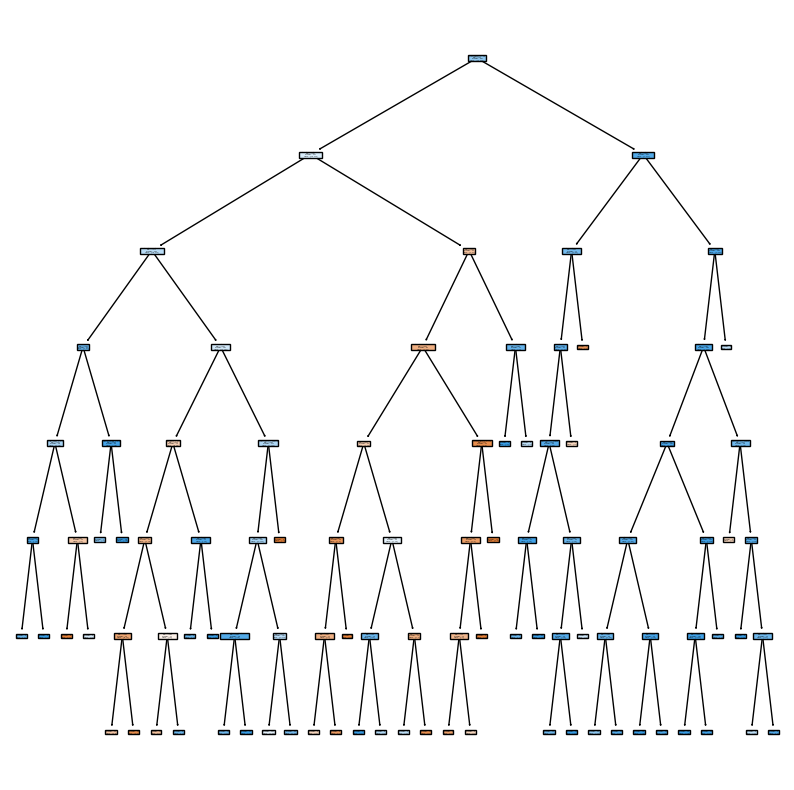

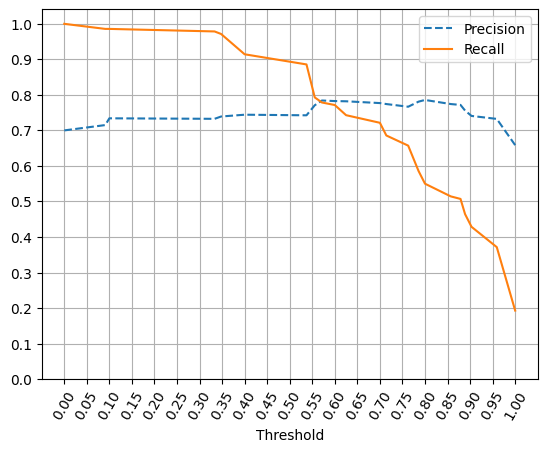

In [18]:
# 이게 괜찮은건가?
process(data_set=data_set, random_state=11, diagram=True, prec_rec=True,
        max_depth=7,
        min_samples_leaf=5,
        min_samples_split=5
)